# SCS3253   Machine Learning Project 
# Group I 
   

#  ** Investigating Predictive Modeling for Airfoil Self-Noise  **
  
  
  Submitted by :   
* Amarendra Sabat
* Claudinei Daitx
* Suwei (Stream) Qi

* **Instruction **

* The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. 

* The span of the airfoil and the observer position were the same in all of the experiments.

* The NASA data set was obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.

* Relevant Papers:

  * T.F. Brooks, D.S. Pope, and A.M. Marcolini. 
Airfoil self-noise and prediction. 
Technical report, NASA RP-1218, July 1989. 

  * K. Lau. 
A neural networks approach for aerofoil noise prediction. 
Masterâ€™s thesis, Department of Aeronautics. 
Imperial College of Science, Technology and Medicine (London, United Kingdom), 2006. 

  * R. Lopez. 
Neural Networks for Variational Problems in Engineering. 
PhD Thesis, Technical University of Catalonia, 2008. 

* Citation :

* Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.


Link: [Airfoil Self-Noise Data Set](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#)

##1. Import Python libraries

In [0]:
import os
import warnings
import pandas as pd
import seaborn as sns
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display

# Machine learn packages
import tensorflow as tf
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from mpl_toolkits.mplot3d import Axes3D
from tensorflow import keras

# Remove all warnings in this notebook
warnings.filterwarnings('ignore')
tf.logging.set_verbosity(tf.logging.ERROR)

# Same random seed state
np.random.seed(42)
random_state=42

## 2. Load airfloil dataset

### 2.1 Attribute Information

1. Frequency (Hertzs) 
2. Angle of attack (degrees)
3. Chord length (meters)
4. Free-stream velocity (meters per second) 
5. Suction side displacement thickness (meters)

The only output is: 
6. Scaled sound pressure level (decibels)

In [0]:
url_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
columns = ['frequency',
           'angle_of_attack', 
           'chord_length', 
           'free_stream_velocity',
           'suction_side_displacement_thickness',
           'scaled_sound_pressure_level']

features = ['frequency','angle_of_attack', 
            'chord_length', 
            'free_stream_velocity',
            'suction_side_displacement_thickness']

airfoil_dataset = pd.read_csv(url_file, sep='\t', header=None, names=columns)


In [3]:
airfoil_dataset.head()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
airfoil_dataset.tail()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224
1502,6300,15.6,0.1016,39.6,0.052849,104.204


In [5]:
airfoil_dataset.describe()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [6]:
airfoil_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
frequency                              1503 non-null int64
angle_of_attack                        1503 non-null float64
chord_length                           1503 non-null float64
free_stream_velocity                   1503 non-null float64
suction_side_displacement_thickness    1503 non-null float64
scaled_sound_pressure_level            1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


### 2.2 Insights



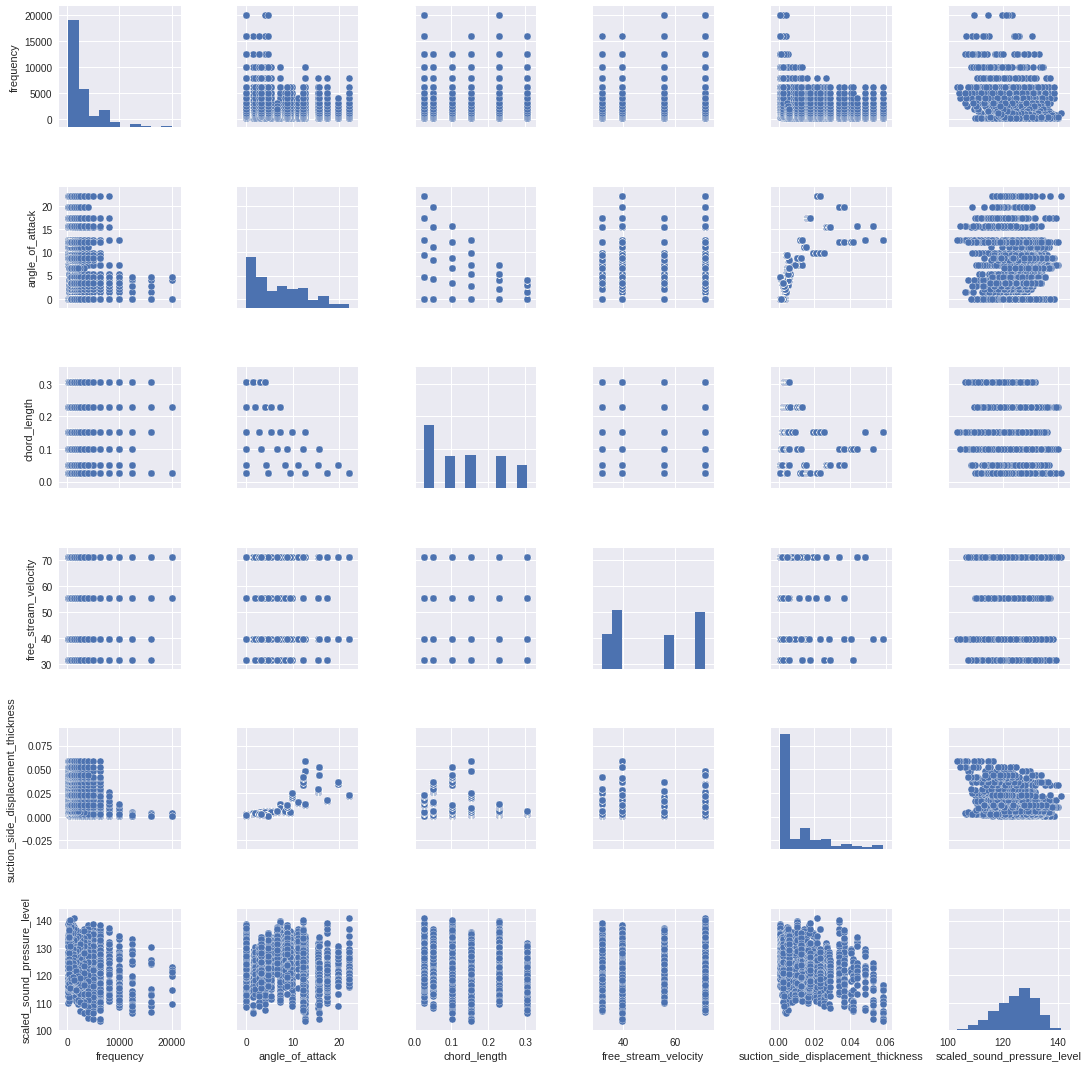

In [7]:
airfoil_plot = airfoil_dataset.copy()
sns.pairplot(airfoil_plot)



*   There are only four free stream velocities.
    *   31.7 m/s
    *   39.6 m/s
    *   55.5 m/s
    *   71.3 m/s
    


In [8]:
airfoil_plot["free_stream_velocity"].value_counts()

39.6    480
71.3    465
31.7    281
55.5    277
Name: free_stream_velocity, dtype: int64

*   There are six chord lengths:
    *   2.5 cm
    *   5 cm
    *   10 cm
    *   15 cm
    *   22 cm
    *   30 cm


In [9]:
airfoil_plot["chord_length"].value_counts()

0.0254    278
0.1524    271
0.2286    266
0.1016    263
0.0508    237
0.3048    188
Name: chord_length, dtype: int64

## 3. Examine dimensions in a graphic


You can use this [concept](https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/) to reduce the number of features in your dataset without having to lose much information and keep or improve the model’s performance.  In this case, you can see two different dimensionality reductions PCA and T-SNE and, it shows that this dataset is non-linear.






### 3.1 Split features and targets

In this section, I will split the original dataset in two new datasets:


1.   Features: all columns except the target column
2.   Target: only the target column





In [0]:
train_data = airfoil_dataset.copy()
train_set = train_data.drop("scaled_sound_pressure_level", axis = 1)
train_labels = train_data["scaled_sound_pressure_level"].copy()

### 3.2 Visualization using PCA



Using PCA is possible to see this dataset is non-linear and I can not get good results if I use a linear model such as Linear Regression. 

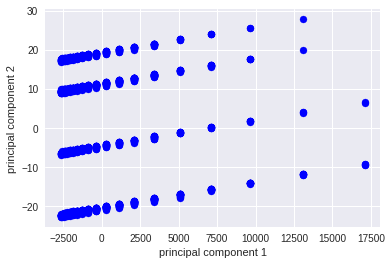

In [11]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_set)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, train_labels], axis = 1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c='b', marker='o')

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')


plt.show()

### 3.3 Visualization using t-SNE

Using T-SNE you can see in this dataset all the clusters and detect that you need a non-linear model to get the best results for the prediction.

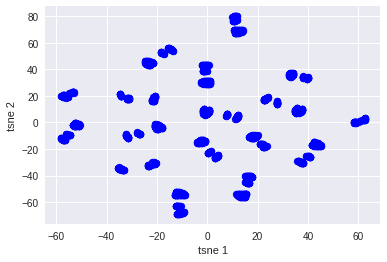

In [12]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

data_tsne = TSNE(random_state=random_state).fit_transform(train_set)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(data_tsne[:,0], data_tsne[:,1],  c='b', marker='o')

ax.set_xlabel('tsne 1')
ax.set_ylabel('tsne 2')


plt.show()

## Choosing my model

### 4.1 Feature Engine

For this scenario I'm using three feature engines:


*   Quantile transformer: This method transforms the features to follow a uniform or a normal distribution. This method is good when you work with non-linear datasets
*   Max Abs scaler: Scale each feature by its maximum absolute value.
*   Standard scaler: Standardize features by removing the mean and scaling to unit variance.





In [0]:
train_set = QuantileTransformer(random_state=0).fit_transform(train_set)
train_set = MaxAbsScaler().fit_transform(train_set)
train_set = StandardScaler().fit_transform(train_set)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_set, 
                                                    train_labels, 
                                                    test_size=0.2)

In [0]:
def show_table(data):
    html = ['<link rel=\"stylesheet\" href=\"https://www.w3schools.com/w3css/4/w3.css\">',
            "<table class=\"w3-table-all\" ",
            '<tr>',
            '<th>Model</th>',
            '<th>R2 score</th>',
            '<th>MSE score</th>',
            '</tr>']
    for row in data:
        key, r2, mse = row
        html.append("<tr>")
        html.append("<td>{0}</td>".format(key))
        html.append("<td>{0}</td>".format(r2))
        html.append("<td>{0}</td>".format(mse))
        html.append("</tr>")

    html.append("</table>")
    return html

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [scaled_sound_pressure_level]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$scaled_sound_pressure_level^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,40])
    plt.legend()
    plt.show()


### Machine learning models

I have the class ModelEstimator to train and predict all models. In this case, I am using linear and non-linear models to see the difference between them.


In [0]:
class ModelEstimator():
    def __init__(self, models, parameters):
        self.models = models
        self.parameters = parameters

    def fit(self, X_train, X_test, y_train, y_test, cv=3, refit=True):
        results = []
        for key, model in self.models.items():
            current_parameter = self.parameters.get(key, {})
            gs = GridSearchCV(model, 
                              current_parameter,
                              cv=cv, 
                              scoring=None, 
                              refit=refit,
                              return_train_score=True)
            gs.fit(X_train, y_train)
            y_predict = gs.predict(X_test)

            results.append((key, r2_score(y_test, y_predict), mean_squared_error(y_test, y_predict)))
            
        return results

Now I am choosing a few models and parameters to test and get the best result for each model. In this case I do not need to choose a specific parameter because the ModelEstimator class is using GridSearchCV to decide the best estimator for each model.

In [0]:
models_to_train = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'BayesianRidge': BayesianRidge(compute_score=True),
        'SVR': SVR()
    }

parameters_to_train = {
    'LinearRegression': {'fit_intercept': [True, False], 'normalize': [True, False]},
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0]},
    'ElasticNet': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0, 0.1, 0.5, 1, 10, 100]},
    'BayesianRidge': {},
    'SVR': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['auto', 'scale']}   
}

train_estimator = ModelEstimator(models_to_train, parameters_to_train)
results = train_estimator.fit(X_train, X_test, y_train, y_test, cv=5)

### 4.3 Neural network


Another approach is to use neural networks to find best results. In this case,
I am using five hidden layers and Ridge (L2) for the regularization.


In [0]:

model_activation = tf.nn.relu
model_kernel = keras.regularizers.l2(0.01)
layer_unit = 64


model = keras.Sequential([
    keras.layers.Flatten(input_shape=[5]),

    keras.layers.Dense(layer_unit, 
                       activation=model_activation, 
                       kernel_regularizer=model_kernel),
    
    keras.layers.Dense(layer_unit, 
                       activation=model_activation, 
                       kernel_regularizer=model_kernel),
    
    keras.layers.Dense(layer_unit, 
                       activation=model_activation, 
                       kernel_regularizer=model_kernel),
    
    keras.layers.Dense(layer_unit, 
                       activation=model_activation, 
                       kernel_regularizer=model_kernel),

    keras.layers.Dense(1)
])


model.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

history  = model.fit(X_train, y_train, epochs=500, validation_split = 0.2, verbose=0)

y_pred = model.predict(X_test).flatten()

results.append(('Neural network', r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)) )

## Results


*   Using linear regressions such as LinearRegression the best model has an accuracy of nearby 45%.

*   Using non-linear regressions such as SVR the best model has an accuracy of nearby 79%. It is 34% more than linear models.

* Using a neural network the accuracy is around 88%. It is around 10% more than SVR.

For this dataset using a neural network, you can get the best result but, it does not mean the SVR not fit well. It means for this dataset and this amount of data (1503 rows) a neural network fits better than an SVR model.




In [24]:
html_results = show_table(results)
display(HTML(''.join(html_results)))

Model,R2 score,MSE score
LinearRegression,0.4568062110663442,26.531048242586873
Ridge,0.45686912517307376,26.52797534809731
Lasso,0.45551532899816394,26.594098400972552
ElasticNet,0.45551532899816394,26.594098400972552
BayesianRidge,0.4568668381953528,26.52808705025128
SVR,0.7981376926095791,9.859498994362172
Neural network,0.8892580886540213,5.4089333351256155


In these graphs you can see the best result, for this scenario is using Neural network.

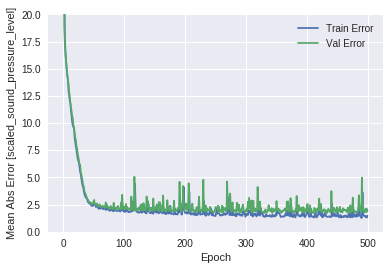

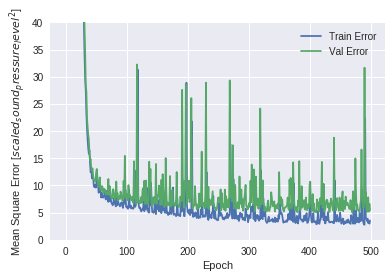

In [20]:
plot_history(history)